<AxesSubplot: >

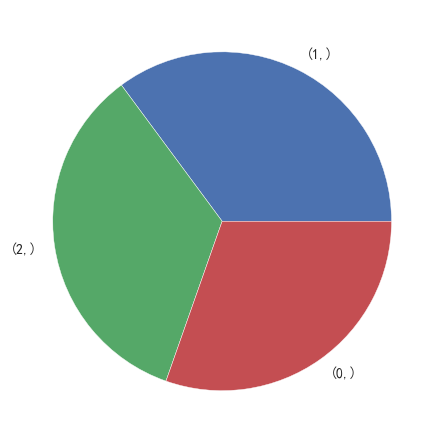

In [38]:
# 画图
pd.DataFrame(result_qt.labels_).value_counts().plot(kind='pie')

In [33]:
#平滑均匀，用户细分营销，但可能损失信息
pd.DataFrame(result_qt.labels_).value_counts() # 结果均匀

1    35138
2    34484
0    30378
dtype: int64

In [29]:
kmeans_qt = KMeans(n_clusters=3)
result_qt = kmeans.fit(qt_data)
result_qt.labels_

array([2, 2, 2, ..., 2, 1, 0])

In [28]:
# kmeans 每二种用法
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal',random_state=0)
# 变成平滑的正太分布数据
qt_data = qt.fit_transform(score_fa)
qt_data

array([[-0.50007406, -0.27239277,  0.736054  ],
       [ 0.0954538 , -0.15718856,  1.28441105],
       [ 0.93354137,  1.13244444,  1.80492656],
       ...,
       [ 2.45019361, -0.74707792,  0.98579831],
       [-0.46261041, -1.55426961, -0.75800423],
       [ 0.51787259,  1.16623543, -0.79551975]])

In [27]:
# 找同数量稀少的一类
outlier_kmeans[outlier_kmeans['cluster']==2]

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,cluster
2,57340,122,26,32,36,216,2
42,427493,27,31,39,52,149,2
88,1064704,1024,3,2,33,1062,2
92,1081759,53,21,23,55,152,2
102,1151911,81,88,86,46,301,2
...,...,...,...,...,...,...,...
99919,875025117,114,38,169,69,390,2
99940,875212040,155,13,6,64,238,2
99958,875407306,118,83,20,50,271,2
99973,875481914,49,28,91,87,255,2


In [25]:
# 拼接
outlier_kmeans = df.join(pd.DataFrame(result.labels_))
outlier_kmeans = outlier_kmeans.rename(columns = {0:'cluster'})
outlier_kmeans.head()

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,cluster
0,41360,34,3,3,9,49,0
1,52094,44,17,5,18,84,0
2,57340,122,26,32,36,216,2
3,76885,42,3,6,1,52,0
4,89150,20,15,2,2,39,0


<AxesSubplot: >

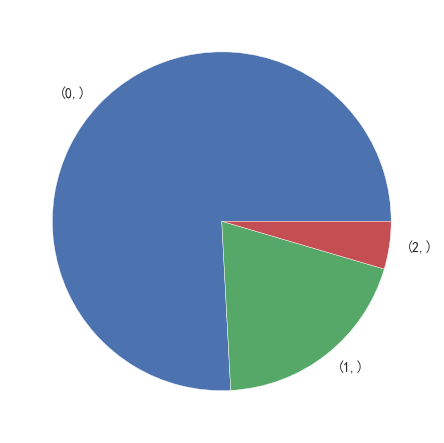

In [23]:
# 画图
pd.DataFrame(result.labels_).value_counts().plot(kind='pie')

In [21]:
pd.DataFrame(result.labels_).value_counts()

0    75846
1    19599
2     4555
dtype: int64

In [20]:
# 进行kmeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(score_fa)
result.labels_

array([0, 0, 2, ..., 1, 0, 0])

In [15]:
# kmeans -异常识别
var = [0,1,2]
skew_var = {}
for i in var:
    skew_var[i] = score_fa[i].skew()
skew_var  # 偏度 >0右偏； <0左偏，大部分经济数据为可偏

{0: 2.0976326116915716, 1: 51.881232563238015, 2: 6.093417229665708}

In [14]:
# 得分
score_fa = pd.DataFrame(fa.get_component_scores(st_data))

In [13]:
# 因子分析
from fa_kit import FactorAnalysis
#实例化 对输入数据进行主成分的提取
fa=FactorAnalysis.load_data_samples(
    st_data,
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
#设定提取主成分的方式 使用top_n
fa.find_comps_to_retain(method="top_n",num_keep=3)
#最大方差法对因子进行旋转
fa.rotate_components(method="varimax")
# 查看因子权重 ，因子的载荷矩阵
pd.DataFrame(fa.comps['rot'])

array([0, 1, 2], dtype=int64)

,0,1,2
0,0.004039,0.992900,0.007811
1,0.671476,-0.090569,0.100081
2,0.741002,0.076706,-0.084707
3,-0.004504,0.007874,0.991336


In [11]:
pca_bank = df.join(score_pca)

In [10]:
score_pca = pd.DataFrame(pca.fit_transform(st_data))

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(st_data)
pca.explained_variance_
pca.explained_variance_ratio_

PCA(n_components=3)

array([1.60786876, 1.00252275, 0.7339482 ])

array([0.40196317, 0.25062818, 0.18348521])

In [7]:
from sklearn import preprocessing
st_data =preprocessing.scale(data)
st_data

array([[-0.3374763 , -0.79112548, -0.43037594,  0.19094614],
       [-0.23861679, -0.1198557 , -0.33391478,  0.93300005],
       [ 0.53248735,  0.31167487,  0.9683109 ,  2.41710788],
       ...,
       [-0.23861679,  4.38724139,  2.17407542,  0.19094614],
       [-0.57473911, -0.69522979, -0.47860652, -0.46865734],
       [ 0.59180305, -0.07190786,  0.38954393, -0.46865734]])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   CNT_TBM  100000 non-null  int64
 1   CNT_ATM  100000 non-null  int64
 2   CNT_POS  100000 non-null  int64
 3   CNT_CSC  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
km = KMeans(n_clusters=3)
label = km.fit(data)
label.head()

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute 'split'

In [4]:
data = df.iloc[:,1:-1]
data.head()

,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC
0,34,3,3,9
1,44,17,5,18
2,122,26,32,36
3,42,3,6,1
4,20,15,2,2


In [5]:
df.shape

(100000, 6)

In [6]:
df.shape

(100000, 6)

In [3]:
df = pd.read_csv('profile_bank.csv')
df.head(2)

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT
0,41360,34,3,3,9,49
1,52094,44,17,5,18,84


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模\连续变量降维')